# Making Predictions

* Load the houseprices data from Kaggle

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = "ignore")

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from sklearn import linear_model
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

In [2]:
house = pd.read_csv("data/houseprices.csv")
house.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X = house[["LotArea","OverallQual","OverallCond","YearBuilt","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BedroomAbvGr","GarageCars","WoodDeckSF"]]
Y = house["SalePrice"]

* **Split your data into train and test sets.**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

* **Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.**

In [5]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print("Coefficents : {}".format(model.coef_))
print("Intercept : {}".format(model.intercept_))

Coefficents : [ 5.11306937e-01  2.00810152e+04  5.52395428e+03  3.97642101e+02
  1.51774898e+01  6.80060890e+00  2.04313016e+01  1.13706263e+01
  6.88001124e+00  3.86819392e+01 -4.84908561e+03  1.37770344e+04
  2.69220671e+01]
Intercept : -875664.1403881385


In [6]:
X_test = sm.add_constant(X_test)
results = sm.OLS(y_test,X_test).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     136.2
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          5.16e-109
Time:                        21:21:31   Log-Likelihood:                -3456.3
No. Observations:                 292   AIC:                             6939.
Df Residuals:                     279   BIC:                             6986.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.328e+05   2.11e+05     -2.994      0.003   -1.05e+06   -2.17e+05
LotArea          1.0314      0.374      2.761      0.006       0.296       1.767
OverallQual   1.603e+04   2558.062      6.266      0.000     1.1e+04    2.11e+04
OverallCond   8028.5404   2023.853      3.967      0.000    4044.580     1.2e+04
YearBuilt      259.3186    108.339      2.394      0.017      46.053     472.584
BsmtFinSF1      14.0333      5.771      2.431      0.016       2.672      25.394
TotalBsmtSF     34.9822      8.378      4.175      0.000      18.490      51.474
1stFlrSF        45.0116     12.259      3.672      0.000      20.880      69.143
2ndFlrSF        40.8992     11.344      3.605      0.000      18.568      63.230
LowQualFinSF   -48.1307     30.860     -1.560      0.120    -108.879      12.618
GrLivArea       37.7801     10.830      3.489      0.001      16.461      59.099
BedroomAbvGr  -1.31e+04   3073.010     -4.264      0.000   -1.92e+04   -7055.485
GarageCars    1.135e+04   3764.414      3.014      0.003    3935.223    1.88e+04
WoodDeckSF      46.8572     20.393      2.298      0.022       6.714      87.001
==============================================================================
Omnibus:                      134.268   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1301.363
Skew:                           1.607   Prob(JB):                    2.59e-283
Kurtosis:                      12.830   Cond. No.                     1.27e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* **Predict the house prices in the test set and evaluate the performance of your model using the metrics we mentioned in this checkpoint.**

In [7]:
test_preds = results.predict(X_test)
train_preds = model.predict(X_train)

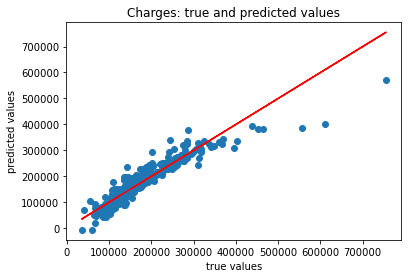

In [8]:
plt.scatter(y_test,test_preds)
plt.plot(y_test,y_test, c ="r")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, test_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, test_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, test_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - test_preds) / test_preds)) * 100))

Mean absolute error of the prediction is: 22395.19443608408
Mean squared error of the prediction is: 1118664955.2897727
Root mean squared error of the prediction is: 33446.449068470225
Mean absolute percentage error of the prediction is: 20.387177757249518


* **Is the performance of your model satisfactory? Why?**

Our R-squared value is 87.4 percent and It is quite enough for our model. I think the errors are enough even the errors are looking high because our target values are very big values.

* **Try to improve your model in terms of prediction performance by adding or removing some variables.**

In [10]:
house["LotArea_year"] = house["LotArea"] * house ["YearBuilt"]
house["LotArea_ov_qual"] = house["LotArea"] * house["OverallQual"]
house["LotArea_ov_cond"] = house["LotArea"] * house["OverallCond"]
house["OverallQuall_square"] = house["OverallQual"]**2

In [11]:
X = house[["LotArea","OverallQual","OverallCond","YearBuilt","OverallQuall_square","BsmtFinSF1","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BedroomAbvGr","GarageCars","WoodDeckSF","LotArea_year","LotArea_ov_qual","LotArea_ov_cond"]]
Y = house["SalePrice"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

print("Coefficents : {}".format(model.coef_))
print("Intercept : {}".format(model.intercept_))

Coefficents : [ 2.41448399e+01 -4.69860316e+04  1.05373979e+04  5.75631789e+02
  5.82525882e+03  1.48629273e+01  9.59124150e+00  1.79458636e+01
  1.64531963e+01 -3.41533104e+00  3.09837288e+01 -1.01371280e+03
  1.21741491e+04  1.93461637e+01 -1.01224833e-02 -4.30811939e-01
 -1.71890258e-01]
Intercept : -1070708.2056154495


In [14]:
X_test = sm.add_constant(X_test)
results = sm.OLS(y_test,X_test).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     154.7
Date:                Fri, 18 Sep 2020   Prob (F-statistic):          3.52e-127
Time:                        21:21:32   Log-Likelihood:                -3401.2
No. Observations:                 292   AIC:                             6836.
Df Residuals:                     275   BIC:                             6899.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.091e+05    3.8e+05     -0.812      0.417   -1.06e+06     4.4e+05
LotArea               -38.3055     37.499     -1.022      0.308    -112.127      35.516
OverallQual          -6.43e+04   8346.008     -7.704      0.000   -8.07e+04   -4.79e+04
OverallCond          7045.6541   3204.144      2.199      0.029     737.888    1.34e+04
YearBuilt             235.2472    195.410      1.204      0.230    -149.443     619.938
OverallQuall_square  5680.3739    668.895      8.492      0.000    4363.568    6997.180
BsmtFinSF1             19.3816      4.850      3.997      0.000       9.835      28.928
TotalBsmtSF            29.7716      7.020      4.241      0.000      15.952      43.592
1stFlrSF               29.6835     10.386      2.858      0.005       9.238      50.129
2ndFlrSF               29.9396      9.559      3.132      0.002      11.121      48.759
LowQualFinSF          -23.1761     25.963     -0.893      0.373     -74.287      27.935
GrLivArea              36.4469      9.062      4.022      0.000      18.607      54.286
BedroomAbvGr        -5197.9777   2723.724     -1.908      0.057   -1.06e+04     164.021
GarageCars           1.237e+04   3205.282      3.859      0.000    6059.424    1.87e+04
WoodDeckSF             31.4849     17.107      1.841      0.067      -2.192      65.162
LotArea_year            0.0156      0.019      0.815      0.416      -0.022       0.053
LotArea_ov_qual         1.0345      0.294      3.519      0.001       0.456       1.613
LotArea_ov_cond         0.3719      0.270      1.375      0.170      -0.161       0.904
==============================================================================
Omnibus:                      104.563   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.095
Skew:                           1.218   Prob(JB):                    8.40e-184
Kurtosis:                      10.960   Cond. No.                     2.32e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.76e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
test_preds = results.predict(X_test)
train_preds = model.predict(X_train)

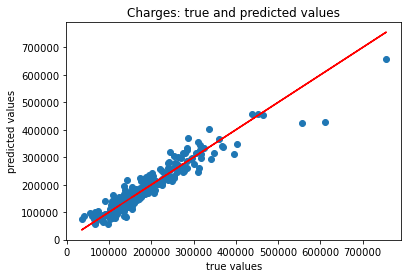

In [18]:
plt.scatter(y_test,test_preds)
plt.plot(y_test,y_test, c ="r")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

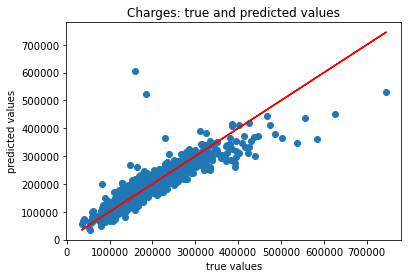

In [19]:
plt.scatter(y_train,train_preds)
plt.plot(y_train,y_train, c ="r")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [16]:
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, test_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, test_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, test_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - test_preds) / test_preds)) * 100))

Mean absolute error of the prediction is: 19000.377620312014
Mean squared error of the prediction is: 767186969.7902277
Root mean squared error of the prediction is: 27698.140186485944
Mean absolute percentage error of the prediction is: 11.336580387222318
